In [16]:
import pandas as pd

df = pd.read_csv("Final Dataset.csv")

In [17]:
df['fdi'] = df['fdi% of gdp']*df['gdp in billions of dollars']/100
df['govt debt'] = df['govt debt % of gdp']*df['gdp in billions of dollars']/100
df = df.round(2)

In [18]:
columns = ['revenue expenditure', 'capital expenditure',
       'total expenditure', 'agriculture expenditure',
       'rural development expenditure', 'energy expenditure',
       'industry and minerals expenditure', 'transport expenditure',
       'internal debt', 'gdp in billions of dollars'
       , 'fdi', 'govt debt']

EDA

*1.Descrptive statistics*

In [19]:
#describe all excpet year column

df_key_variables = df[columns]

df_key_variables

,revenue expenditure,capital expenditure,total expenditure,agriculture expenditure,rural development expenditure,energy expenditure,industry and minerals expenditure,transport expenditure,internal debt,gdp in billions of dollars,fdi,govt debt
0,4.17,3.33,7.50,NaN,NaN,NaN,NaN,NaN,NaN,62.42,0.02,23.83
1,5.30,3.90,9.20,NaN,NaN,NaN,NaN,NaN,NaN,67.35,0.03,25.31
2,5.98,4.37,10.35,NaN,NaN,NaN,NaN,NaN,NaN,71.46,0.03,26.55
3,6.17,4.45,10.62,NaN,NaN,NaN,NaN,NaN,NaN,85.52,0.00,29.19
4,7.01,5.26,12.27,NaN,NaN,NaN,NaN,NaN,NaN,99.53,0.01,28.63
5,8.33,6.45,14.77,NaN,NaN,NaN,NaN,NaN,NaN,98.47,0.05,28.42
6,9.23,6.01,15.24,NaN,NaN,NaN,NaN,NaN,NaN,103.00,0.05,34.65
7,10.42,7.32,17.74,NaN,NaN,NaN,NaN,NaN,NaN,121.00,0.10,44.81
8,13.04,9.87,22.91,NaN,NaN,NaN,NaN,NaN,NaN,137.00,0.04,50.14
9,14.52,8.81,23.32,NaN,NaN,NaN,NaN,NaN,NaN,153.00,0.14,59.30


*2. Time Series Plots*

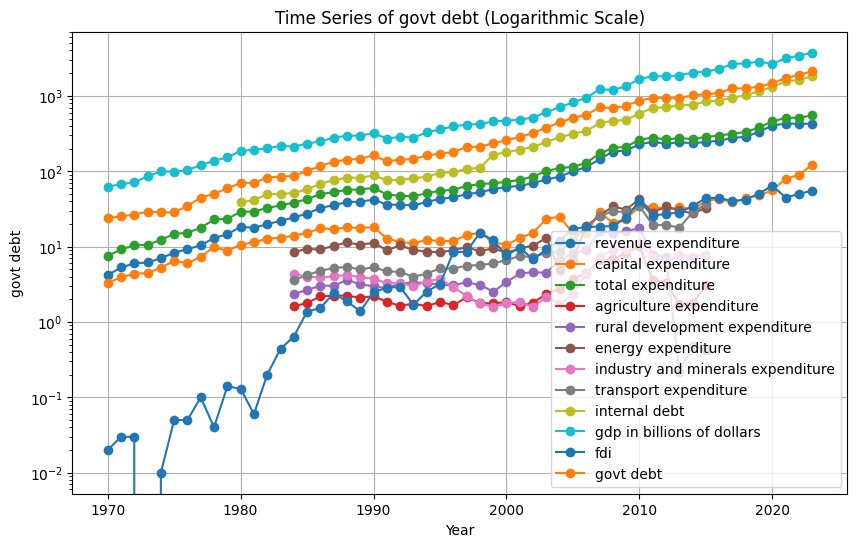

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot time series for each key variable logarithmic
for column in df_key_variables.columns:
    plt.semilogy(df['year'], df[column], marker='o')
    plt.title(f'Time Series of {column} (Logarithmic Scale)')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.grid(True)
    # plt.plot(df['year'], df[column], marker='o')
    # plt.title(f'Time Series of {column}')
    # plt.xlabel('Year')
    # plt.ylabel(column)
    # plt.grid(True)
plt.legend(df_key_variables.columns)
plt.show()

*3. Correlation Analysis and Heatmap*

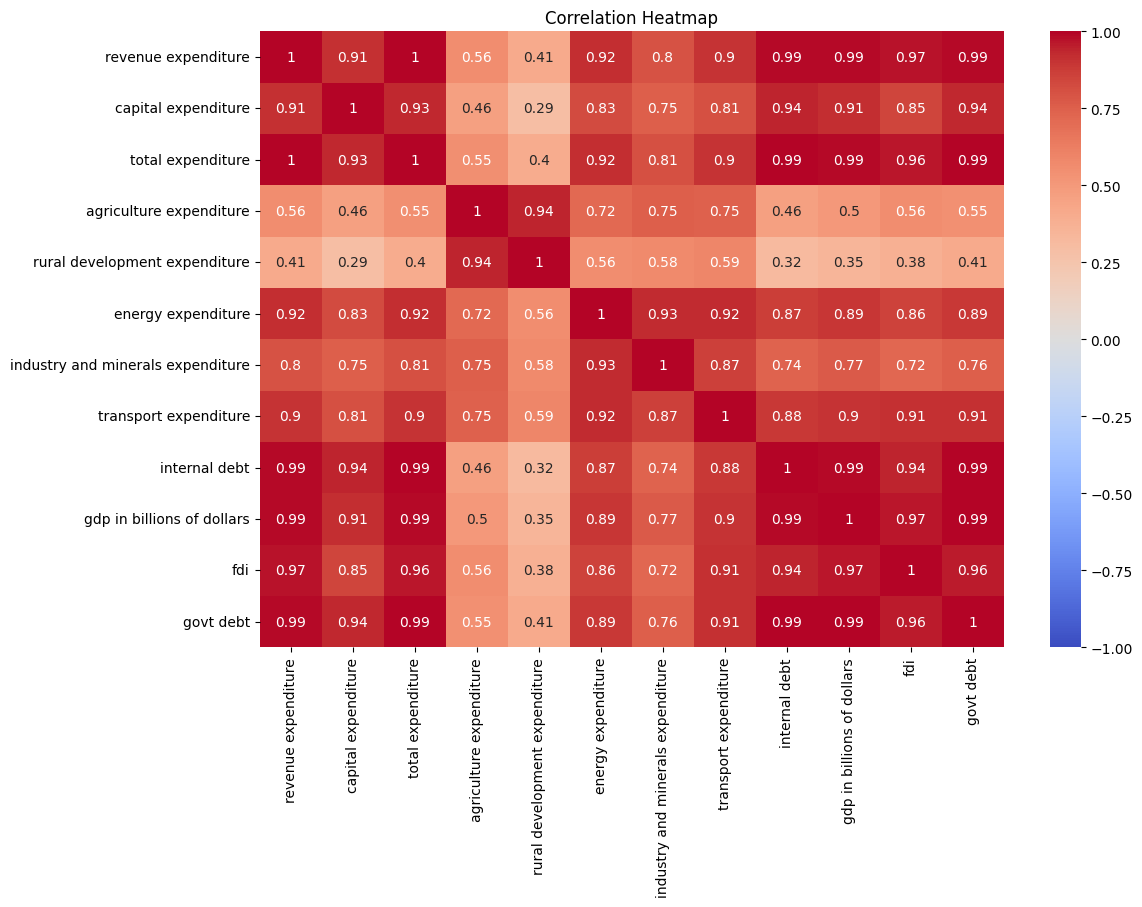

In [21]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df_key_variables.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

*4. Trends in FDI, government debt, and GDP*

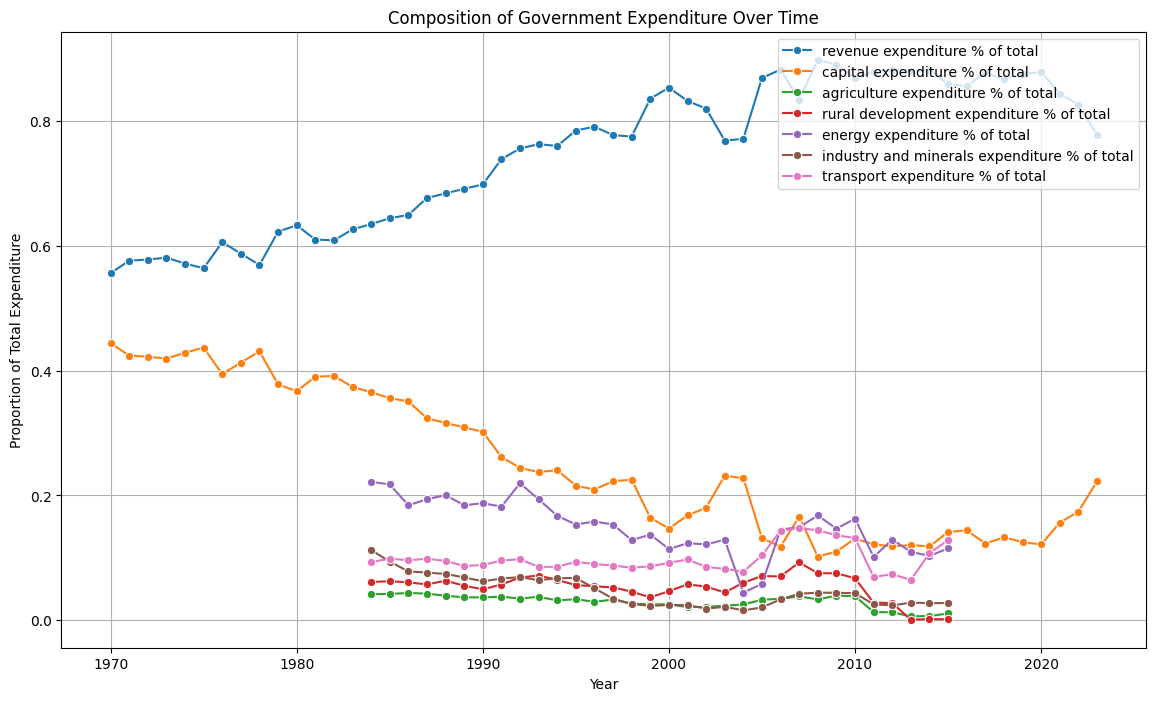

In [22]:
# Calculate the proportion of each expenditure type over total expenditure
expenditure_columns = ['revenue expenditure', 'capital expenditure', 'agriculture expenditure', 
                       'rural development expenditure', 'energy expenditure', 
                       'industry and minerals expenditure', 'transport expenditure']

# Normalize expenditure columns by total expenditure
for column in expenditure_columns:
    df[f'{column} % of total'] = df[column] / df['total expenditure']

# Plot the composition over time
df_plot = df.melt(id_vars=['year'], value_vars=[f'{col} % of total' for col in expenditure_columns],
                  var_name='Expenditure Type', value_name='Proportion')

plt.figure(figsize=(14, 8))
sns.lineplot(data=df_plot, x='year', y='Proportion', hue='Expenditure Type', marker='o')
plt.title('Composition of Government Expenditure Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Total Expenditure')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


*5. Trends in FDI, government debt, and GDP*

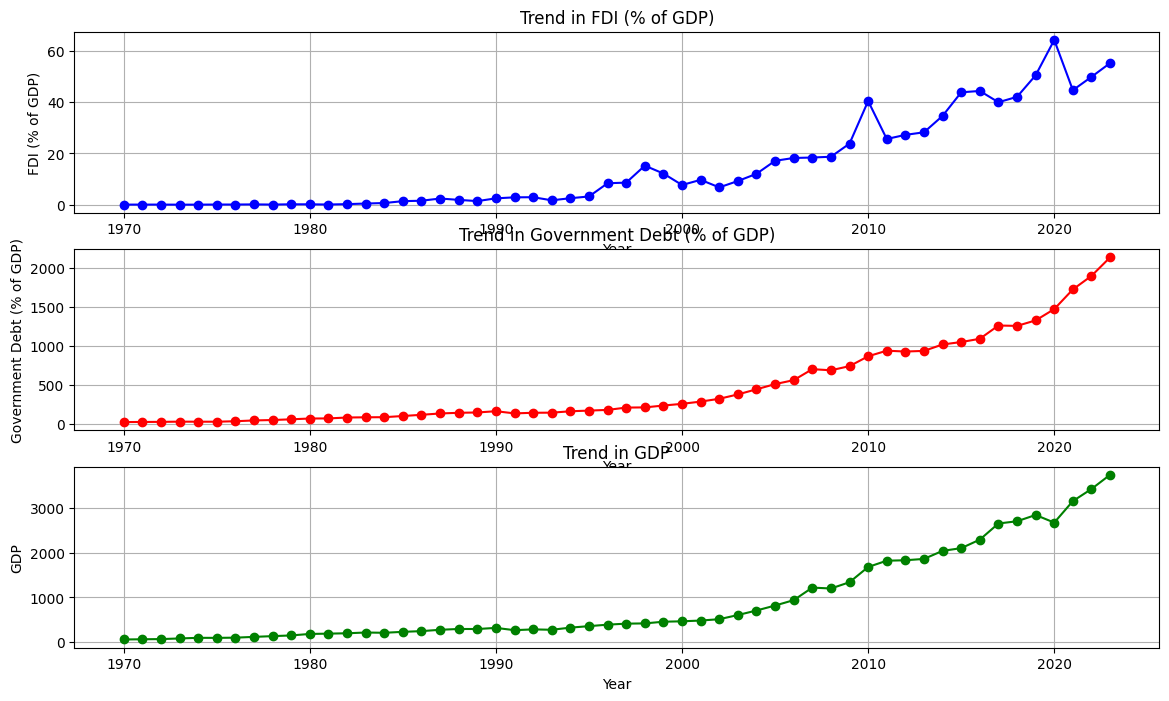

In [23]:
# Plot trends for FDI, government debt, and GDP
plt.figure(figsize=(14, 8))

# FDI trend
plt.subplot(3, 1, 1)
plt.plot(df['year'], df['fdi'], marker='o', color='blue')
plt.title('Trend in FDI (% of GDP)')
plt.xlabel('Year')
plt.ylabel('FDI (% of GDP)')
plt.grid(True)

# Government debt trend
plt.subplot(3, 1, 2)
plt.plot(df['year'], df['govt debt'], marker='o', color='red')
plt.title('Trend in Government Debt (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Government Debt (% of GDP)')
plt.grid(True)

# GDP trend
plt.subplot(3, 1, 3)
plt.plot(df['year'], df['gdp in billions of dollars'], marker='o', color='green')
plt.title('Trend in GDP')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.grid(True)